In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['figure.dpi'] = 70
from sklearn.impute import SimpleImputer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Solar_Internship/sales_data.csv',sep = ',', header='infer')
print(" The Data Imported is :")
data

 The Data Imported is :


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [3]:
data.shape

(186850, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


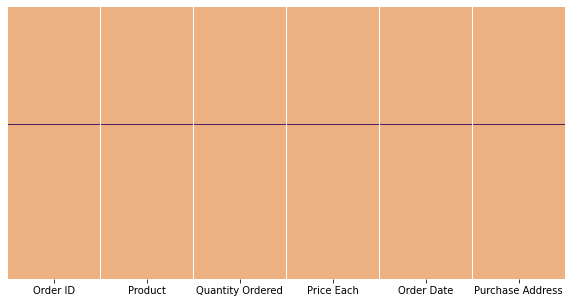

In [8]:
plt.figure(figsize=(10,5)) 
sns.heatmap(data.isnull(),cmap='flare',yticklabels=False,cbar=False)
plt.show()

In [9]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184390,NaN,NaN,NaN,NaN,NaN,NaN
184779,NaN,NaN,NaN,NaN,NaN,NaN
185239,NaN,NaN,NaN,NaN,NaN,NaN
185614,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data = data.dropna(how = 'all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [11]:
temp_data = data[data['Order Date'].str[0:2] == 'Or']
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185359,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
data = data[data['Order Date'].str[0:2]!='Or']
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [13]:
df = data.copy()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [14]:
df['day'] = df['Order Date'].apply(lambda date : date.split("/")[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25
...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",12
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",28
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",09
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",31


In [15]:
#Extracting the month of sale from 'Order date' column
df['Month'] = df['Order Date'].apply(lambda date : date.split("/")[0])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,01
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",12,10
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",28,10
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",09,10
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",31,10


In [16]:
df['time'] = df['Order Date'].apply(lambda date : date.split(" ")[1])
df['time'] = df['time'].apply(lambda date : date.split(":")[0])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,01,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,01,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,01,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,01,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,01,11
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",12,10,04
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",28,10,22
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",09,10,20
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",31,10,17


In [17]:
#To confirm that sales of all months are present
df['Month'].nunique()

12

In [18]:
# Check the format of the 'Month' column
type(df['Month'].iloc[0])

str

In [19]:
# Converting the 'Month' column from 'str' format to 'int' format.
df['Month'] = df['Month'].astype('int32')
type(df['Month'].iloc[0])

numpy.int32

In [20]:
# Checking a single address
df['Purchase Address'].iloc[0]

'944 Walnut St, Boston, MA 02215'

In [21]:
#Extracting city name and state name using split

city_name  = df['Purchase Address'].iloc[0].split(",")[1].strip(" ")
state_name = df['Purchase Address'].iloc[0].split(",")[2].split(" ")[1]
print(city_name)
print(state_name)

Boston
MA


In [22]:
# Functions which return city name and state name by taking address as an argument

#city_name
def get_city(address):
    return address.split(",")[1].strip(" ")
#state_name
def get_state(address):
    return address.split(",")[2].split(" ")[1]

# Add the 'City' column into the datafrmae ad fill the cities with their respective states
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,1,21,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,1,14,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,1,13,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,1,20,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,1,11,Austin (TX)
...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",12,10,04,San Francisco (CA)
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",28,10,22,Los Angeles (CA)
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",09,10,20,San Francisco (CA)
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",31,10,17,Seattle (WA)


In [23]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,1,21,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,1,14,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,1,13,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,1,20,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,1,11,Austin (TX)


In [24]:
type(df['Quantity Ordered'].iloc[0])

str

In [25]:
type(df['Price Each'].iloc[0])

str

In [26]:
#Converting 'Quantity ordered' and 'Price Each' in proper data formats
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # int type
df['Price Each'] = pd.to_numeric(df['Price Each']) # float type

In [27]:
#Adding Sales column in data frame
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,1,21,Boston (MA),700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,1,14,Portland (OR),14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,1,13,San Francisco (CA),23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,1,20,Los Angeles (CA),149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,1,11,Austin (TX),11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",12,10,04,San Francisco (CA),3.84
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",28,10,22,Los Angeles (CA),11.99
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",09,10,20,San Francisco (CA),3.84
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",31,10,17,Seattle (WA),700.00


In [28]:
# groupby Months and then sum to get monthly sales
Month_sales = df.groupby(['Month']).sum()
Month_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [29]:
#Month with max sales
Month_sales['Sales'].max()

4613443.34

range(1, 13)


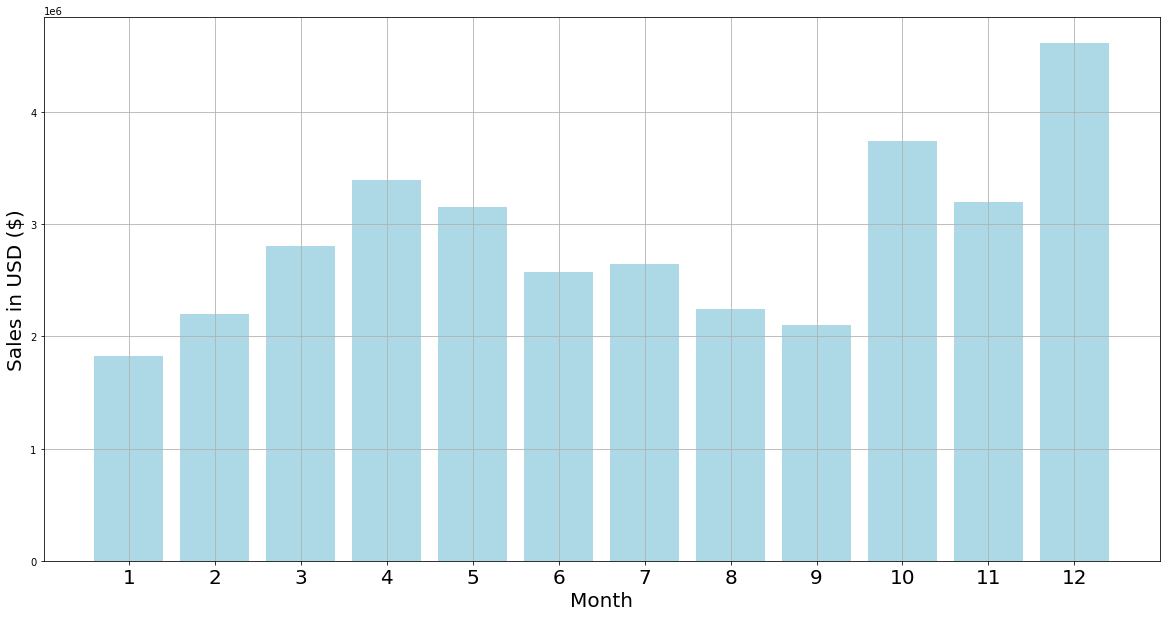

In [30]:
# Visualizing sales by months using matplotlib

months = range(1,13)
print(months)

plt.figure(figsize=(20,10))
plt.bar(months, Month_sales['Sales'],color='lightblue')
plt.xticks(months, size=20)
plt.ylabel('Sales in USD ($)', size=20)
plt.xlabel('Month', size=20)
plt.grid()
plt.show()

In [31]:
# groupby City and then sum to get sale in each city
City_sales = df.groupby(['City']).sum()
City_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [32]:
# Store all cities in an array (to be used in bar plot)
cities = [city for city, df in City_sales.groupby(['City'])]

In [33]:
# Maximum sale in a city
City_sales['Sales'].max()

8262203.91

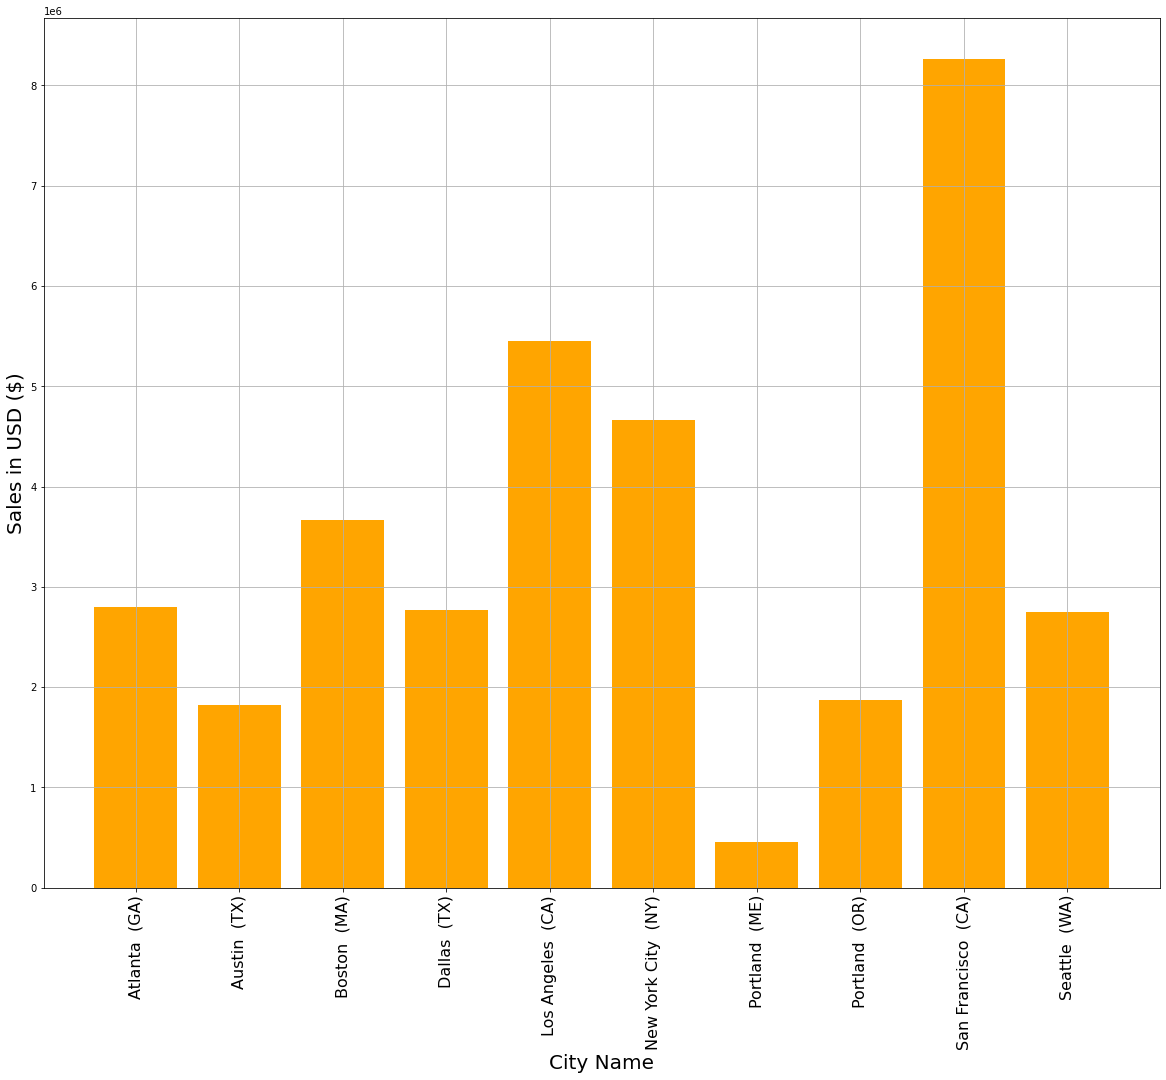

In [34]:
# Visualizing sales by city using matplotlib

plt.figure(figsize=(20,16))
plt.bar(cities, City_sales['Sales'], color = 'orange')
plt.xticks(cities, rotation='vertical', size=16)
plt.ylabel('Sales in USD ($)', size=20)
plt.xlabel('City Name', size=20)
plt.grid()
plt.show()

In [35]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,1,21,Boston (MA),700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,1,14,Portland (OR),14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,1,13,San Francisco (CA),23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,1,20,Los Angeles (CA),149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,1,11,Austin (TX),11.99


In [36]:
# Check the type of 'Order Date'
type(df['Order Date'].iloc[0])

str

In [37]:
# Convert the 'Order Date' from string to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Check the type of 'Order Date' again
type(df['Order Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
# Adding 'Hour' and 'Minutes' columns into the dataframe
df['Hour'] = df['Order Date'].apply(lambda time : time.hour)
df['Minute'] = df['Order Date'].apply(lambda time : time.minute)

In [39]:

# Checking the data type of 'Hour'
type(df['Hour'].iloc[0])

numpy.int64

In [40]:
# Add a Count column in the dataframe
df['Count'] = 1
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time,City,Sales,Hour,Minute,Count
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",22,1,21,Boston (MA),700.00,21,25,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",28,1,14,Portland (OR),14.95,14,15,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",17,1,13,San Francisco (CA),23.98,13,33,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",05,1,20,Los Angeles (CA),149.99,20,33,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",25,1,11,Austin (TX),11.99,11,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",12,10,04,San Francisco (CA),3.84,4,32,1
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",28,10,22,Los Angeles (CA),11.99,22,0,1
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",09,10,20,San Francisco (CA),3.84,20,58,1
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",31,10,17,Seattle (WA),700.00,17,21,1


In [41]:
# groupby Houre and then sum to get sale in each hour
Hour_sales = df.groupby(['Hour']).count()
Hour_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,Month,time,City,Sales,Minute,Count
Hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [42]:
# Store all hours in an array(to be used in plot)
hours = [hour for hour, df in Hour_sales.groupby(['Hour'])]

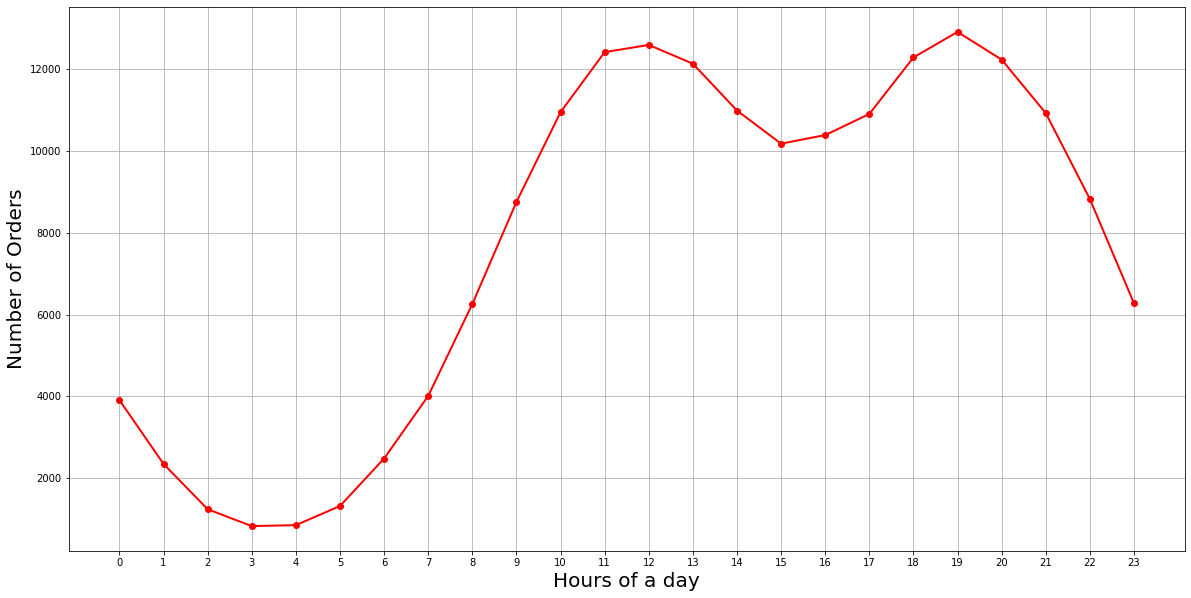

In [43]:
# Visualizing sales by hours using matplotlib

plt.figure(figsize=(20,10))
plt.plot(hours, Hour_sales['Count'], lw=2, marker='o', color='r')
plt.xticks(hours)
plt.ylabel('Number of Orders',size=20)
plt.xlabel('Hours of a day',size=20)
plt.grid()
plt.show()